<a href="https://colab.research.google.com/github/Ernestug/30Days-of-Learning-Data-Analysis-Using-Power-BI-for-Students/blob/main/Master_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import the necessary python libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn import preprocessing


In [3]:
# To upload dataset into google colab directory
from google.colab import files
uploaded = files.upload()

Saving FFDB_20230222.csv to FFDB_20230222.csv


In [5]:
df = pd.read_csv("FFDB_20230222.csv")
df.head()

<ipython-input-5-2fa1555e6f9a>:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FFDB_20230222.csv")


,name,short_name,lat_dec,lon_dec,trap_depth_m,trap,sample,subsample,ocean,upwelling,...,close,split,collectionArea_m2,species_original,species_harmonised,collectionInterval,shellCount,shellFlux_n_m2_day,importDate,reference_2
0,Station Aleutian Basin,ABP,53.05,-177.0,3198,ABP_T1,ABP_T1_s1,ABP_T1_s1_ss1,PAC,N,...,1990-09-12T00:00:00Z,NaN,NaN,N_pachyderma,Neogloboquadrina_pachyderma,1728000,NaN,64.0,2022-07-29T10:27:00Z,NaN
1,Station Aleutian Basin,ABP,53.05,-177.0,3198,ABP_T1,ABP_T1_s1,ABP_T1_s1_ss1,PAC,N,...,1990-09-12T00:00:00Z,NaN,NaN,G_umbilicata,Globigerina_bulloides,1728000,NaN,6.4,2022-07-29T10:27:00Z,NaN
2,Station Aleutian Basin,ABP,53.05,-177.0,3198,ABP_T1,ABP_T1_s1,ABP_T1_s1_ss1,PAC,N,...,1990-09-12T00:00:00Z,NaN,NaN,T_quinqueloba,Turborotalita_quinqueloba,1728000,NaN,0.0,2022-07-29T10:27:00Z,NaN
3,Station Aleutian Basin,ABP,53.05,-177.0,3198,ABP_T1,ABP_T1_s1,ABP_T1_s1_ss1,PAC,N,...,1990-09-12T00:00:00Z,NaN,NaN,G_glutinata,Globigerinita_glutinata,1728000,NaN,0.0,2022-07-29T10:27:00Z,NaN
4,Station Aleutian Basin,ABP,53.05,-177.0,3198,ABP_T1,ABP_T1_s1,ABP_T1_s1_ss1,PAC,N,...,1990-09-12T00:00:00Z,NaN,NaN,O_universa,Orbulina_universa,1728000,NaN,0.0,2022-07-29T10:27:00Z,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150176 entries, 0 to 150175
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 150176 non-null  object 
 1   short_name           150176 non-null  object 
 2   lat_dec              150176 non-null  float64
 3   lon_dec              150176 non-null  float64
 4   trap_depth_m         150176 non-null  int64  
 5   trap                 150176 non-null  object 
 6   sample               150176 non-null  object 
 7   subsample            150176 non-null  object 
 8   ocean                150176 non-null  object 
 9   upwelling            150176 non-null  object 
 10  reference_1          148615 non-null  object 
 11  data_source          48785 non-null   object 
 12  min_size_micron      150155 non-null  float64
 13  max_size_micron      93488 non-null   float64
 14  duration_days        33846 non-null   float64
 15  all_species_count

In [8]:
df[["open", "close"]].head()

,open,close
0,1990-08-23T00:00:00Z,1990-09-12T00:00:00Z
1,1990-08-23T00:00:00Z,1990-09-12T00:00:00Z
2,1990-08-23T00:00:00Z,1990-09-12T00:00:00Z
3,1990-08-23T00:00:00Z,1990-09-12T00:00:00Z
4,1990-08-23T00:00:00Z,1990-09-12T00:00:00Z


In [13]:
df['open'] = pd.to_datetime(df['open'])
df['close'] = pd.to_datetime(df['close'])


In [20]:
df[["open", "close"]].head()

,open,close
0,1990-08-23 00:00:00+00:00,1990-09-12 00:00:00+00:00
1,1990-08-23 00:00:00+00:00,1990-09-12 00:00:00+00:00
2,1990-08-23 00:00:00+00:00,1990-09-12 00:00:00+00:00
3,1990-08-23 00:00:00+00:00,1990-09-12 00:00:00+00:00
4,1990-08-23 00:00:00+00:00,1990-09-12 00:00:00+00:00


In [21]:
df[["open", "close"]].tail()

,open,close
150171,2011-08-01 00:00:00+00:00,2011-08-16 00:00:00+00:00
150172,2011-08-01 00:00:00+00:00,2011-08-16 00:00:00+00:00
150173,2011-08-01 00:00:00+00:00,2011-08-16 00:00:00+00:00
150174,2011-08-01 00:00:00+00:00,2011-08-16 00:00:00+00:00
150175,2011-08-01 00:00:00+00:00,2011-08-16 00:00:00+00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150176 entries, 0 to 150175
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   name                 150176 non-null  object             
 1   short_name           150176 non-null  object             
 2   lat_dec              150176 non-null  float64            
 3   lon_dec              150176 non-null  float64            
 4   trap_depth_m         150176 non-null  int64              
 5   trap                 150176 non-null  object             
 6   sample               150176 non-null  object             
 7   subsample            150176 non-null  object             
 8   ocean                150176 non-null  object             
 9   upwelling            150176 non-null  object             
 10  reference_1          148615 non-null  object             
 11  data_source          48785 non-null   object             
 12  mi

In [22]:
df.set_index(["open", "close"], inplace = True)

In [23]:
df.head()

name  \
open                      close                                               
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00  Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00  Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00  Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00  Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00  Station Aleutian Basin   

                                                    short_name  lat_dec  \
open                      close                                           
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        ABP    53.05   
                          1990-09-12 00:00:00+00:00        ABP    53.05   
                          1990-09-12 00:00:00+00:00        ABP    53.05   
                          1990-09-12 00:00:00+00:00        ABP    53.05   
                          1990-09-12 00:00:00+00:00        ABP    53.05   

                                                     lon_dec  trap_depth_m  \
open                      close                                              
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00   -177.0          3198   
                          1990-09-12 00:00:00+00:00   -177.0          3198   
                          1990-09-12 00:00:00+00:00   -177.0          3198   
                          1990-09-12 00:00:00+00:00   -177.0          3198   
                          1990-09-12 00:00:00+00:00   -177.0          3198   

                                                       trap     sample  \
open                      close                                          
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00  ABP_T1  ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1  ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1  ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1  ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1  ABP_T1_s1   

                                                         subsample ocean  \
open                      close                                            
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00  ABP_T1_s1_ss1   PAC   
                          1990-09-12 00:00:00+00:00  ABP_T1_s1_ss1   PAC   
                          1990-09-12 00:00:00+00:00  ABP_T1_s1_ss1   PAC   
                          1990-09-12 00:00:00+00:00  ABP_T1_s1_ss1   PAC   
                          1990-09-12 00:00:00+00:00  ABP_T1_s1_ss1   PAC   

                                                    upwelling  ...  \
open                      close                                ...   
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00         N  ...   
                          1990-09-12 00:00:00+00:00         N  ...   
                          1990-09-12 00:00:00+00:00         N  ...   
                          1990-09-12 00:00:00+00:00         N  ...   
                          1990-09-12 00:00:00+00:00         N  ...   

                                                    water_depth_m split  \
open                      close                                           
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        3788.0   NaN   
                          1990-09-12 00:00:00+00:00        3788.0   NaN   
                          1990-09-12 00:00:00+00:00        3788.0   NaN   
                          1990-09-12 00:00:00+00:00        3788.0   NaN   
                          1990-09-12 00:00:00+00:00        3788.0   NaN   

                                                     collectionArea_m2  \
open                      close                                          
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00                NaN   
                          1990-09-12 00:00:00+00:00                NaN   
                          1990-09-12 00:00:00+00:00                NaN   
     

In [25]:
df.index

MultiIndex([('1990-08-23 00:00:00+00:00', '1990-09-12 00:00:00+00:00'),
            ('1990-08-23 00:00:00+00:00', '1990-09-12 00:00:00+00:00'),
            ('1990-08-23 00:00:00+00:00', '1990-09-12 00:00:00+00:00'),
            ('1990-08-23 00:00:00+00:00', '1990-09-12 00:00:00+00:00'),
            ('1990-08-23 00:00:00+00:00', '1990-09-12 00:00:00+00:00'),
            ('1990-08-23 00:00:00+00:00', '1990-09-12 00:00:00+00:00'),
            ('1990-09-12 00:00:00+00:00', '1990-10-02 00:00:00+00:00'),
            ('1990-09-12 00:00:00+00:00', '1990-10-02 00:00:00+00:00'),
            ('1990-09-12 00:00:00+00:00', '1990-10-02 00:00:00+00:00'),
            ('1990-09-12 00:00:00+00:00', '1990-10-02 00:00:00+00:00'),
            ...
            ('2011-08-01 00:00:00+00:00', '2011-08-16 00:00:00+00:00'),
            ('2011-08-01 00:00:00+00:00', '2011-08-16 00:00:00+00:00'),
            ('2011-08-01 00:00:00+00:00', '2011-08-16 00:00:00+00:00'),
            ('2011-08-01 00:00:00+00:00', '2011-

In [26]:
df.drop_duplicates()

name  \
open                      close                                                     
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
...                                                                           ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   

                                                    short_name    lat_dec  \
open                      close                                             
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
...                                                        ...        ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   

                                                     lon_dec  trap_depth_m  \
open                      close                                              
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
...                                                      ...           ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   

                                                       trap      sample  \
open                      close                                           
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
...                                                     ...         ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  X

In [28]:
df.dropna(axis=0)
df

name  \
open                      close                                                     
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
                          1990-09-12 00:00:00+00:00        Station Aleutian Basin   
...                                                                           ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   
                          2011-08-16 00:00:00+00:00  South China Sea Xisha Trough   

                                                    short_name    lat_dec  \
open                      close                                             
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
                          1990-09-12 00:00:00+00:00        ABP  53.050000   
...                                                        ...        ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   
                          2011-08-16 00:00:00+00:00        XTS  17.431667   

                                                     lon_dec  trap_depth_m  \
open                      close                                              
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
                          1990-09-12 00:00:00+00:00 -177.000          3198   
...                                                      ...           ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   
                          2011-08-16 00:00:00+00:00  110.886          1460   

                                                       trap      sample  \
open                      close                                           
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
                          1990-09-12 00:00:00+00:00  ABP_T1   ABP_T1_s1   
...                                                     ...         ...   
2011-08-01 00:00:00+00:00 2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  XTS_T1  XTS_T1_s48   
                          2011-08-16 00:00:00+00:00  X

In [29]:
df.columns

Index(['name', 'short_name', 'lat_dec', 'lon_dec', 'trap_depth_m', 'trap',
       'sample', 'subsample', 'ocean', 'upwelling', 'reference_1',
       'data_source', 'min_size_micron', 'max_size_micron', 'duration_days',
       'all_species_counted', 'remarks', 'water_depth_m', 'split',
       'collectionArea_m2', 'species_original', 'species_harmonised',
       'collectionInterval', 'shellCount', 'shellFlux_n_m2_day', 'importDate',
       'reference_2'],
      dtype='object')

In [30]:
df2 = print(df["short_name"].unique())

['ABP' 'ALB' 'AS8' 'AS9' 'BAT' 'BCS' 'BEN' 'BOB' 'CAP' 'CAR' 'CAS' 'CBB'
 'CBL' 'CCG' 'CCM' 'CCN' 'COQ' 'CWR' 'EA1' 'EA2' 'EA3' 'EA4' 'EAS' 'EBC'
 'EST' 'FEV' 'GLB' 'GLS' 'GMO' 'GOA' 'GOM' 'GUA' 'ILP' 'IRM' 'JAM' 'JAT'
 'JBA' 'JGN' 'JGS' 'KGB' 'LEV' 'LLD' 'LPL' 'LPT' 'LWW' 'MAU' 'MBL' 'MOZ'
 'MRI' 'MT1' 'MT3' 'MT4' 'MT5' 'MT7' 'NBA' 'NBB' 'NCR' 'NP4' 'NP5' 'NPK'
 'NWP' 'NWS' 'OKH' 'OKT' 'PAL' 'PAN' 'PAP' 'PUK' 'RYT' 'S47' 'S51' 'S54'
 'SAP' 'SBA' 'SBB' 'SCE' 'SCR' 'SCS' 'SCV' 'SOJ' 'SPB' 'WAB' 'WAS' 'WB1'
 'WC1' 'WC2' 'WC3' 'WC5' 'WC6' 'WC7' 'WEA' 'WRI' 'WTA' 'XTS']


In [31]:
print(df["short_name"].nunique())

94


In [104]:
df3 = df[["short_name", "species_harmonised", "shellFlux_n_m2_day"]].head(50)
df3

  

short_name  \
open                      close                                  
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        ABP   
                          1990-09-12 00:00:00+00:00        ABP   
                          1990-09-12 00:00:00+00:00        ABP   
                          1990-09-12 00:00:00+00:00        ABP   
                          1990-09-12 00:00:00+00:00        ABP   
                          1990-09-12 00:00:00+00:00        ABP   
1990-09-12 00:00:00+00:00 1990-10-02 00:00:00+00:00        ABP   
                          1990-10-02 00:00:00+00:00        ABP   
                          1990-10-02 00:00:00+00:00        ABP   
                          1990-10-02 00:00:00+00:00        ABP   
                          1990-10-02 00:00:00+00:00        ABP   
                          1990-10-02 00:00:00+00:00        ABP   
1990-10-02 00:00:00+00:00 1990-11-27 00:00:00+00:00        ABP   
                          1990-11-27 00:00:00+00:00        ABP   
                          1990-11-27 00:00:00+00:00        ABP   
                          1990-11-27 00:00:00+00:00        ABP   
                          1990-11-27 00:00:00+00:00        ABP   
                          1990-11-27 00:00:00+00:00        ABP   
1990-11-27 00:00:00+00:00 1991-01-22 00:00:00+00:00        ABP   
                          1991-01-22 00:00:00+00:00        ABP   
                          1991-01-22 00:00:00+00:00        ABP   
                          1991-01-22 00:00:00+00:00        ABP   
                          1991-01-22 00:00:00+00:00        ABP   
                          1991-01-22 00:00:00+00:00        ABP   
1991-01-22 00:00:00+00:00 1991-03-19 00:00:00+00:00        ABP   
                          1991-03-19 00:00:00+00:00        ABP   
                          1991-03-19 00:00:00+00:00        ABP   
                          1991-03-19 00:00:00+00:00        ABP   
                          1991-03-19 00:00:00+00:00        ABP   
                          1991-03-19 00:00:00+00:00        ABP   
1991-04-08 00:00:00+00:00 1991-04-28 00:00:00+00:00        ABP   
                          1991-04-28 00:00:00+00:00        ABP   
                          1991-04-28 00:00:00+00:00        ABP   
                          1991-04-28 00:00:00+00:00        ABP   
                          1991-04-28 00:00:00+00:00        ABP   
                          1991-04-28 00:00:00+00:00        ABP   
1991-04-28 00:00:00+00:00 1991-05-18 00:00:00+00:00        ABP   
                          1991-05-18 00:00:00+00:00        ABP   
                          1991-05-18 00:00:00+00:00        ABP   
                          1991-05-18 00:00:00+00:00        ABP   
                          1991-05-18 00:00:00+00:00        ABP   
                          1991-05-18 00:00:00+00:00        ABP   
1991-05-18 00:00:00+00:00 1991-06-07 00:00:00+00:00        ABP   
                          1991-06-07 00:00:00+00:00        ABP   
                          1991-06-07 00:00:00+00:00        ABP   
                          1991-06-07 00:00:00+00:00        ABP   
                          1991-06-07 00:00:00+00:00        ABP   
                          1991-06-07 00:00:00+00:00        ABP   
1991-06-07 00:00:00+00:00 1991-06-27 00:00:00+00:00        ABP   
                          1991-06-27 00:00:00+00:00        ABP   

                                                              species_harmonised  \
open                      close                                                    
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00  Neogloboquadrina_pachyderma   
                          1990-09-12 00:00:00+00:00        Globigerina_bulloides   
                          1990-09-12 00:00:00+00:00    Turborotalita_quinqueloba   
                          1990-09-12 00:00:00+00:00      Globigerinita_glutinata   
                          1990-09-12 00:00:00+00:00            Orbulina_universa   
                          1990-

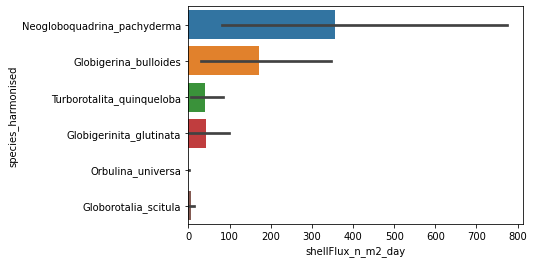

In [105]:
sns.barplot(data = df3, y = "species_harmonised", x = "shellFlux_n_m2_day")
plt.show()

In [114]:
dfh = df.groupby("short_name")["species_harmonised"].value_counts()
dfh.head(30)

short_name  species_harmonised                                     
ABP         Globigerina_bulloides                                      105
            Globigerinita_glutinata                                    105
            Globorotalia_scitula                                       105
            Neogloboquadrina_pachyderma                                105
            Orbulina_universa                                          105
            Turborotalita_quinqueloba                                  105
ALB         Globigerina_bulloides                                       72
            Globigerinella_calida                                       72
            Globigerinella_siphonifera                                  72
            Globigerinita_glutinata                                     72
            Globigerinoides_elongatus_&_Globigerinoides_ruber_albus     72
            Globigerinoides_ruber_ruber                                 72
            Globoconella_inflata

In [121]:
df["species_original"].value_counts()

G_bulloides                      3650
T_quinqueloba                    2966
O_universa                       2868
G_siphonifera                    2863
G_white                          2799
                                 ... 
Neogloboquadrinaleft coiling⁎      13
N.incompta                         13
N_pachyderma_right                 12
N_pachyderma_juvenile              12
N_pachyderma_left                  12
Name: species_original, Length: 411, dtype: int64

In [109]:
sns.countplot(data = dfh, x = "short_name")
plt.show()

ValueError: ignored

In [81]:
print(df["short_name"].unique()) # observe the unique values that constitúte a column

['ABP' 'ALB' 'AS8' 'AS9' 'BAT' 'BCS' 'BEN' 'BOB' 'CAP' 'CAR' 'CAS' 'CBB'
 'CBL' 'CCG' 'CCM' 'CCN' 'COQ' 'CWR' 'EA1' 'EA2' 'EA3' 'EA4' 'EAS' 'EBC'
 'EST' 'FEV' 'GLB' 'GLS' 'GMO' 'GOA' 'GOM' 'GUA' 'ILP' 'IRM' 'JAM' 'JAT'
 'JBA' 'JGN' 'JGS' 'KGB' 'LEV' 'LLD' 'LPL' 'LPT' 'LWW' 'MAU' 'MBL' 'MOZ'
 'MRI' 'MT1' 'MT3' 'MT4' 'MT5' 'MT7' 'NBA' 'NBB' 'NCR' 'NP4' 'NP5' 'NPK'
 'NWP' 'NWS' 'OKH' 'OKT' 'PAL' 'PAN' 'PAP' 'PUK' 'RYT' 'S47' 'S51' 'S54'
 'SAP' 'SBA' 'SBB' 'SCE' 'SCR' 'SCS' 'SCV' 'SOJ' 'SPB' 'WAB' 'WAS' 'WB1'
 'WC1' 'WC2' 'WC3' 'WC5' 'WC6' 'WC7' 'WEA' 'WRI' 'WTA' 'XTS']


In [82]:
print(df["short_name"].nunique())  # to find the number of unique values in a column

94


In [87]:
df4 = df[["species_original","species_harmonised","short_name"]]
df4.head(10)

species_original  \
open                      close                                        
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00     N_pachyderma   
                          1990-09-12 00:00:00+00:00     G_umbilicata   
                          1990-09-12 00:00:00+00:00    T_quinqueloba   
                          1990-09-12 00:00:00+00:00      G_glutinata   
                          1990-09-12 00:00:00+00:00       O_universa   
                          1990-09-12 00:00:00+00:00         G_wilesi   
1990-09-12 00:00:00+00:00 1990-10-02 00:00:00+00:00     N_pachyderma   
                          1990-10-02 00:00:00+00:00     G_umbilicata   
                          1990-10-02 00:00:00+00:00    T_quinqueloba   
                          1990-10-02 00:00:00+00:00      G_glutinata   

                                                              species_harmonised  \
open                      close                                                    
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00  Neogloboquadrina_pachyderma   
                          1990-09-12 00:00:00+00:00        Globigerina_bulloides   
                          1990-09-12 00:00:00+00:00    Turborotalita_quinqueloba   
                          1990-09-12 00:00:00+00:00      Globigerinita_glutinata   
                          1990-09-12 00:00:00+00:00            Orbulina_universa   
                          1990-09-12 00:00:00+00:00         Globorotalia_scitula   
1990-09-12 00:00:00+00:00 1990-10-02 00:00:00+00:00  Neogloboquadrina_pachyderma   
                          1990-10-02 00:00:00+00:00        Globigerina_bulloides   
                          1990-10-02 00:00:00+00:00    Turborotalita_quinqueloba   
                          1990-10-02 00:00:00+00:00      Globigerinita_glutinata   

                                                    short_name  
open                      close                                 
1990-08-23 00:00:00+00:00 1990-09-12 00:00:00+00:00        ABP  
                          1990-09-12 00:00:00+00:00        ABP  
                          1990-09-12 00:00:00+00:00        ABP  
                          1990-09-12 00:00:00+00:00        ABP  
                          1990-09-12 00:00:00+00:00        ABP  
                          1990-09-12 00:00:00+00:00        ABP  
1990-09-12 00:00:00+00:00 1990-10-02 00:00:00+00:00        ABP  
                          1990-10-02 00:00:00+00:00        ABP  
                          1990-10-02 00:00:00+00:00        ABP  
                          1990-10-02 00:00:00+00:00        ABP

In [95]:
df.loc[[:, "harmonised_species"]]

SyntaxError: ignored

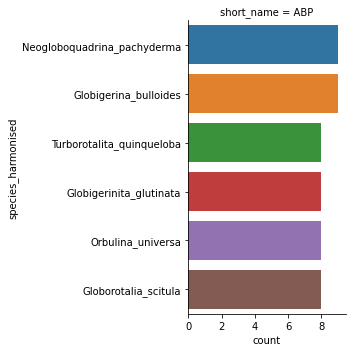

In [119]:
df4 = sns.catplot(data = df3, y= "species_harmonised", kind = "count", col = "short_name")
plt.show()

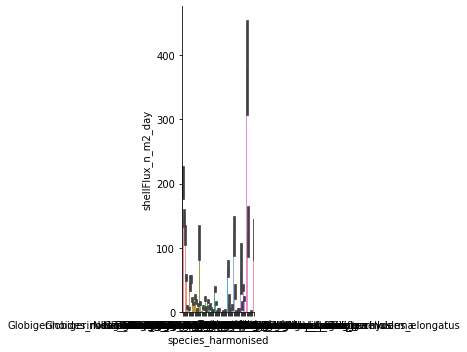

In [120]:
sns.catplot(data= df, x = "species_harmonised", y = "shellFlux_n_m2_day", kind = "bar")
plt.show()


In [19]:
pd.date_range(start =df["open"], end =df["close"])

TypeError: ignored